In [1]:
b1 = [0]*10
b2 = [0]*10
m1 = [0]*10
m2 = [0]*10

#0 Grad:
#1. Messung:
b1[0] = 0.89143454385
m1[0] = -0.0567080934563

#2. Messung:
b2[0] = 1.08976945094
m2[0] = -0.252965866401



#10 Grad:
#1. Messung:
b1[1] =  0.629249260779
m1[1] = -0.0337059775206
#2. Messung:
b2[1] =  1.12058966654
m2[1] = -0.342655375139



#20 Grad:
#1. Messung:
b1[2] =  0.62802872173
m1[2] = -0.0234924585495

#2. Messung:
b2[2] =  1.23491360365
m2[2] = -0.372628347529



#35 Grad:
#1. Messung:
b1[3] =  0.595058553228
m1[3] = -0.040175659683
#2. Messung:
b2[3] =  1.1823300449
m2[3] = -0.296428282796



#50 Grad:
#1. Messung:
b1[4] =  0.429986950956
m1[4] = -0.0487454781745

#2. Messung:
b2[4] =  1.17639550025
m2[4] = -0.221397485347



#70 Grad:
#1. Messung:
b1[5] =  0.548720555926
m1[5] = -0.0333419208802

#2. Messung:
b2[5] =  1.2886599625
m2[5] = 0.0655069282729



#85 Grad:
#1. Messung:
b1[6] =  0.545284295379
m1[6] = -0.0220328967858

#2. Messung:
b2[6] =  1.38503655195
m2[6] = 0.313326196466



#100 Grad:
#1. Messung:
b1[7] =  0.72
m1[7] = 0.0

#2. Messung:
b2[7] =  1.41065204481
m2[7] =  0.475911513887



#110 Grad:
#1. Messung:
b1[8] =  0.738212280646
m1[8] =  -0.0196358022747

#2. Messung:
b2[8] =  1.42436820805
m2[8] = 0.528553199231



#120 Grad:
#1. Messung:
b1[9] =  0.738286564827
m1[9] = -0.0779481349802

#2. Messung:
b2[9] =  1.40385971671
m2[9] = 0.560467567661


#Laser nach vorne: 16 cm
#    nach hinten 10 cm
l1 = .16
l2 = .1

In [50]:
from math import atan, sin, pi, acos, cos
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def get_dist(m,b):
    return b*(m**2 +1)**(-.5)

def get_rad(d1, d2, theta, beta1):
    #return (d2-d1)/(sin(theta))
    return (d2-d1)/(2*cos(theta/2+beta1)*sin(theta/2))

def get_theta(m1, m2):
    return atan((m2-m1))

def get_alpha(l, R):          #check
    return pi/2-acos(l/float(R))

def steering_angle(l1, l2, R, alpha):
    #return atan((l1+l2)/ ( R**2 + l1**2 + 2*l1*R*sin(alpha) )**(.5))
    return pi/2-acos((l1+R*sin(alpha))/ ( R**2 + l1**2 + 2*l1*R*sin(alpha) )**(.5))

In [149]:
R_list = [0]*10
sa_list = [0]*10

for k in range(10):
    d1 = get_dist(m1[k], b1[k])
    d2 = get_dist(m2[k], b2[k])
    beta1 = atan(m1[k])
    R_list[k] = (get_rad(d1, d2, get_theta(m1[k], m2[k]), beta1))
    alpha = get_alpha(l2, R_list[k])
    print(alpha)
    sa_list[k] = 360/(2*pi)*steering_angle(l1, l2, R_list[k], alpha)
    
print(R_list)
print(sa_list)

-0.115107888698
-0.0681233111535
-0.0620465078627
-0.0458002917322
-0.0235346477964
0.0133533467086
0.0410947493002
0.07768000058
0.0928055314138
0.11254068041
[-0.8706716230127264, -1.469062302294932, -1.6127288238383666, -2.1841557310342115, -4.249446721669452, 7.488981909074883, 2.4340859491017572, 1.2886282158297426, 1.0790702948941806, 0.8904460328834042]
[16.731269763506052, 10.059343137707568, 9.175633465907444, 6.795554656228491, 3.5022127272647348, 1.988554474344972, 6.102116667548211, 11.440728443329201, 13.603467436068703, 16.375287191610113]


In [150]:
360/(2*pi)*sa_list[0]

958.6311433437438

In [159]:
eingestellte_winkel = [0, 10, 20, 35, 50, 70, 85, 100,110, 120]
for i in range(5,10):
    sa_list[i] *= -1

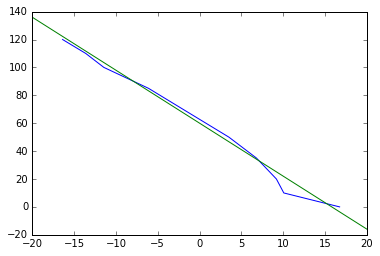

In [164]:

    
x = np.linspace(-20, 20, 50)    
plt.plot(sa_list, eingestellte_winkel, x, -3.8*x+60)

In [153]:
from sklearn.linear_model import RANSACRegressor
import numpy as np

In [161]:
sa_list2 = np.delete(sa_list,8)
sa_list3 =  np.reshape(sa_list2, (np.shape(sa_list2)[0], 1))
print(sa_list)
eingestellte_winkel2 = np.array( [0, 10, 20, 35, 50, 70, 85, 100, 120])


reg = RANSACRegressor()

#print(np.delete(sa_list,8), eingestellte_winkel)

reg.fit(sa_list3, eingestellte_winkel2)
b = reg.predict([[-20], [20  ]])
#m = reg.predict([[333/2+1]])[0] - b
#b_meter = b*res

[16.731269763506052, 10.059343137707568, 9.175633465907444, 6.795554656228491, 3.5022127272647348, -1.988554474344972, -6.102116667548211, -11.440728443329201, -13.603467436068703, -16.375287191610113]


In [162]:
b

array([ 135.17169455,  -17.49807919])

In [163]:
152./40

3.8